In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sales=pd.read_csv("Sales.csv")

In [3]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [4]:
sales['Country'].unique()

array(['Canada', 'Australia', 'United States', 'Germany', 'France',
       'United Kingdom'], dtype=object)

In [5]:
sales.shape

(113036, 18)

In [6]:
Shape=sales.shape
rows=Shape[0]
cols=Shape[1]
print(f"Rows of dataset is :{rows}")
print(f"Column of dataset is: {cols}")

Rows of dataset is :113036
Column of dataset is: 18


In [7]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              113036 non-null  object
 1   Day               113036 non-null  int64 
 2   Month             113036 non-null  object
 3   Year              113036 non-null  int64 
 4   Customer_Age      113036 non-null  int64 
 5   Age_Group         113036 non-null  object
 6   Customer_Gender   113036 non-null  object
 7   Country           113036 non-null  object
 8   State             113036 non-null  object
 9   Product_Category  113036 non-null  object
 10  Sub_Category      113036 non-null  object
 11  Product           113036 non-null  object
 12  Order_Quantity    113036 non-null  int64 
 13  Unit_Cost         113036 non-null  int64 
 14  Unit_Price        113036 non-null  int64 
 15  Profit            113036 non-null  int64 
 16  Cost              113036 non-null  int

In [8]:
sales['Date']=pd.to_datetime(sales['Date'])

In [9]:
sales["Calculated_Date"]=sales[['Year','Month','Day']].apply(lambda x: '{}-{}-{}'.format(x[0],x[1],x[2]),axis=1)
sales["Calculated_Date"]=pd.to_datetime(sales['Calculated_Date'])


In [10]:
sales['Calculated_Date'].head()

0   2013-11-26
1   2015-11-26
2   2014-03-23
3   2016-03-23
4   2014-05-15
Name: Calculated_Date, dtype: datetime64[ns]

In [11]:
sales.isnull().sum()

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
Calculated_Date     0
dtype: int64

In [12]:
sales.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,15.665753,2014.401739,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360
std,8.781567,1.272510,11.021936,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


In [13]:
sales['Unit_Cost'].describe()

count    113036.000000
mean        267.296366
std         549.835483
min           1.000000
25%           2.000000
50%           9.000000
75%          42.000000
max        2171.000000
Name: Unit_Cost, dtype: float64

In [14]:
sales['Revenue'].describe()

count    113036.000000
mean        754.370360
std        1309.094674
min           2.000000
25%          63.000000
50%         223.000000
75%         800.000000
max       58074.000000
Name: Revenue, dtype: float64

In [15]:
sales['Unit_Cost'].max()

2171

In [16]:
sales['Order_Quantity'].max()

32

In [17]:
sales['Profit'].max()

15096

Text(0, 0.5, 'Sales')

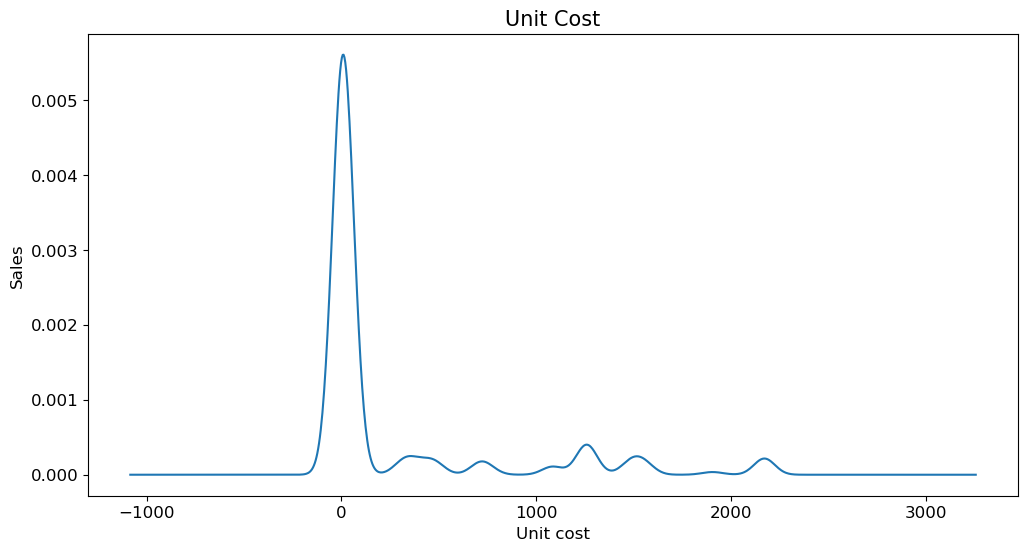

In [18]:
sales['Unit_Cost'].plot(kind='density',figsize=(12,6),fontsize=12)
plt.title("Unit Cost",fontsize=15)
plt.xlabel("Unit cost",fontsize=12)
plt.ylabel("Sales",fontsize=12)

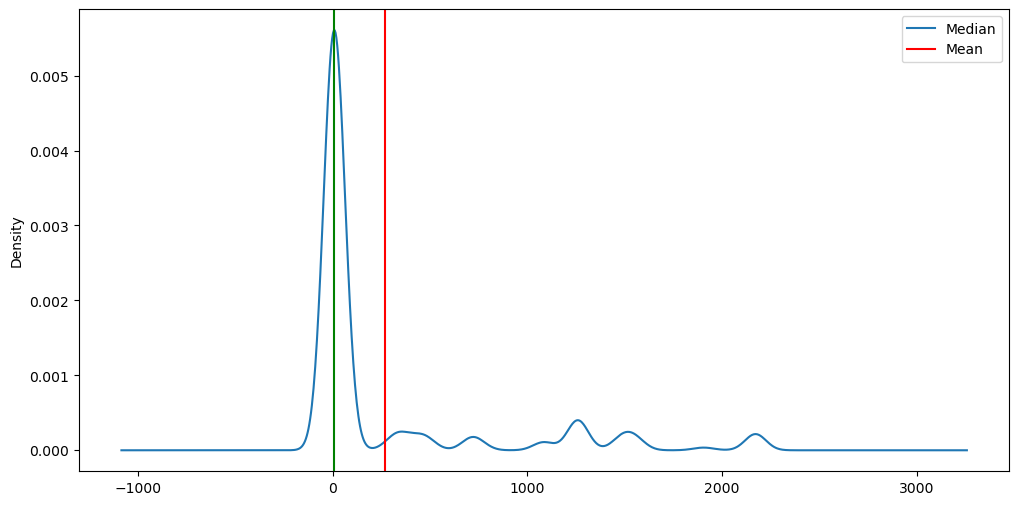

In [19]:
ax=sales['Unit_Cost'].plot(kind="density",figsize=(12,6))

mean=ax.axvline(sales['Unit_Cost'].mean(),color="red")
median=ax.axvline(sales['Unit_Cost'].median(),color='g')
plt.legend({'Median':median,'Mean':mean})

Text(0, 0.5, 'Dollars')

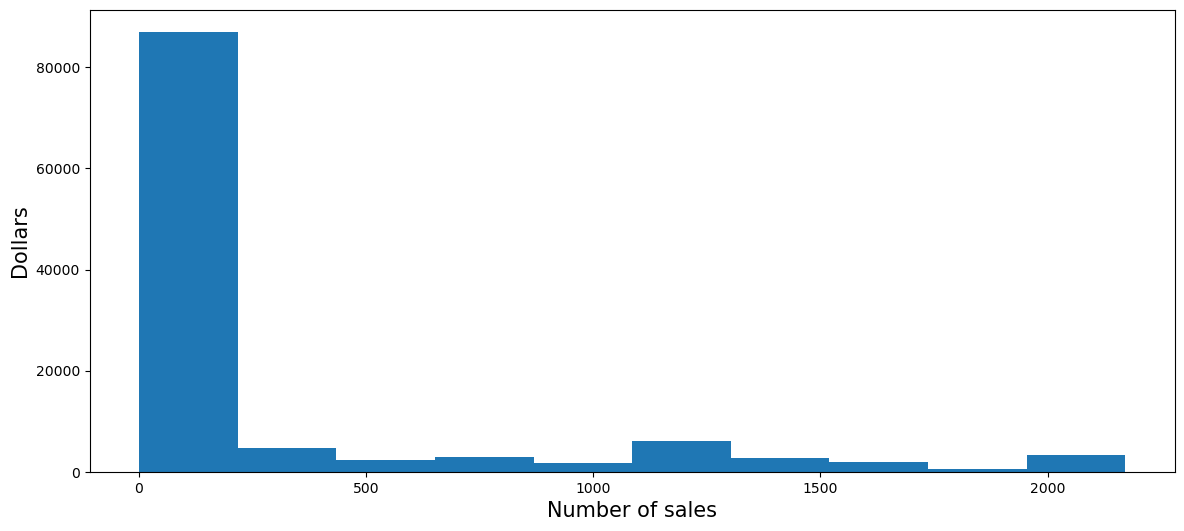

In [20]:
ax=sales['Unit_Cost'].plot(kind='hist',figsize=(14,6))
ax.set_xlabel('Number of sales',fontsize=15)
ax.set_ylabel('Dollars',fontsize=15)

In [21]:
sales['Customer_Age'].value_counts().head()

31    4382
34    4300
29    4214
32    4092
28    3988
Name: Customer_Age, dtype: int64

<Axes: >

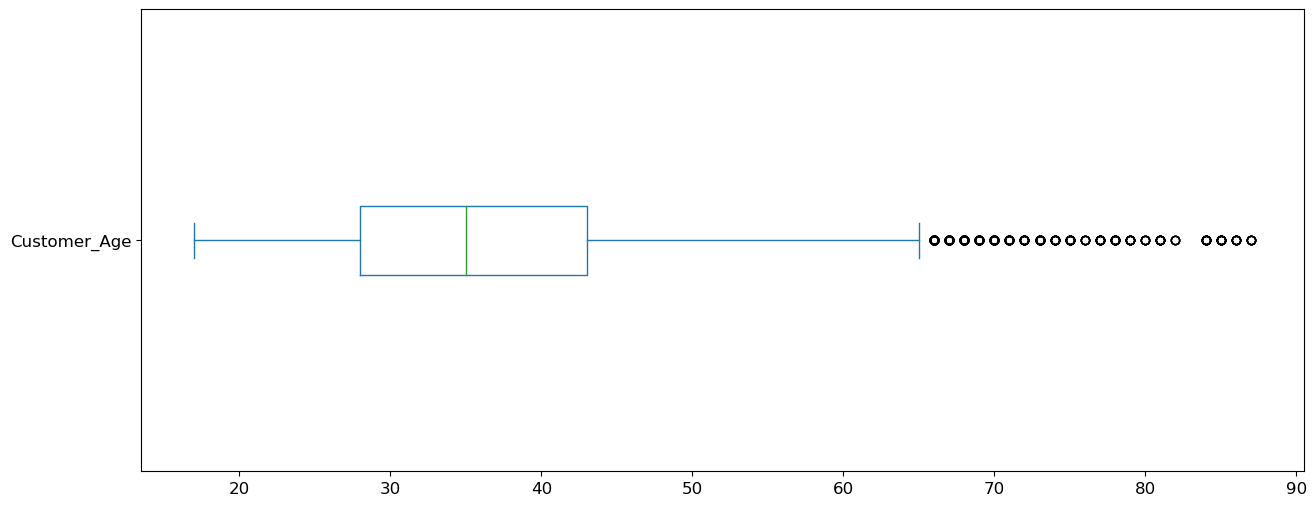

In [22]:
sales['Customer_Age'].plot(kind='box',vert=False,figsize=(15,6),fontsize=12)

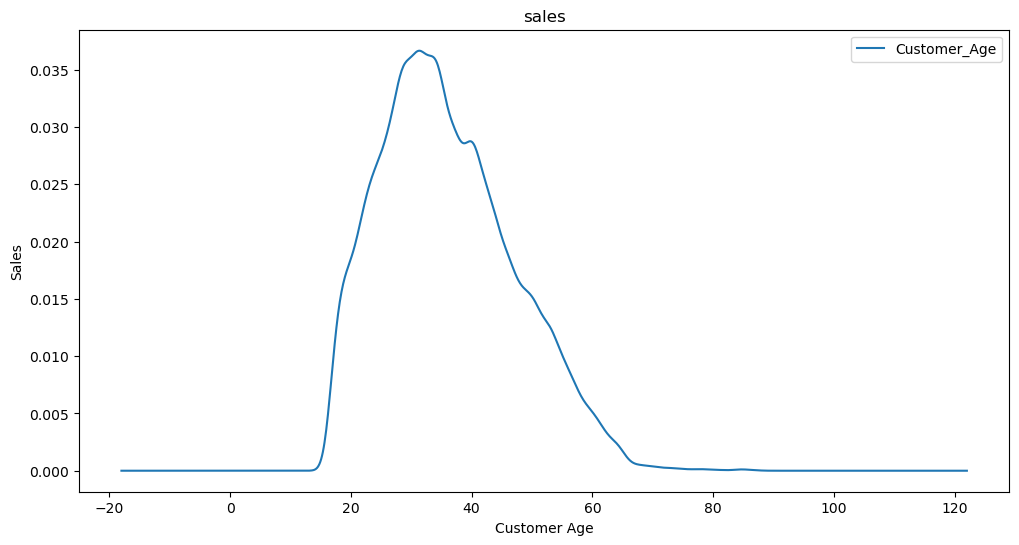

In [23]:
sales['Customer_Age'].plot(kind='kde',figsize=(12,6))
plt.title("sales")
plt.xlabel("Customer Age")
plt.ylabel("Sales")
plt.legend()

In [24]:
sales['Month'].value_counts()


June         11234
December     11200
May          11128
April        10182
March         9674
January       9284
February      9022
October       8750
November      8734
August        8200
September     8166
July          7462
Name: Month, dtype: int64

<Axes: >

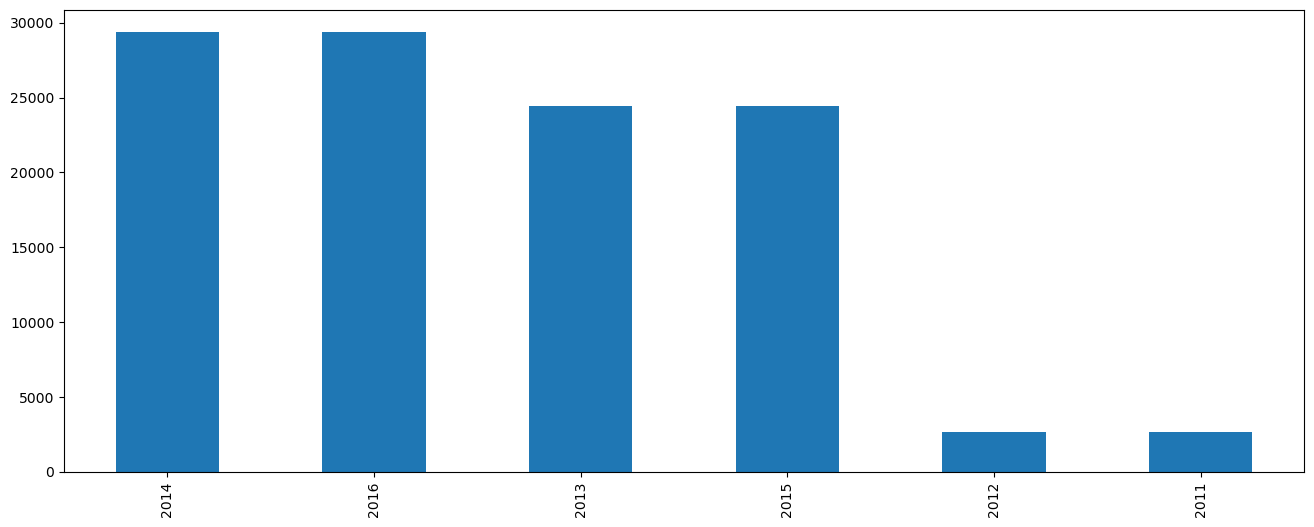

In [25]:
sales['Year'].value_counts().plot(kind='bar',figsize=(16,6))

In [26]:
sales['Year'].value_counts()

2014    29398
2016    29398
2013    24443
2015    24443
2012     2677
2011     2677
Name: Year, dtype: int64

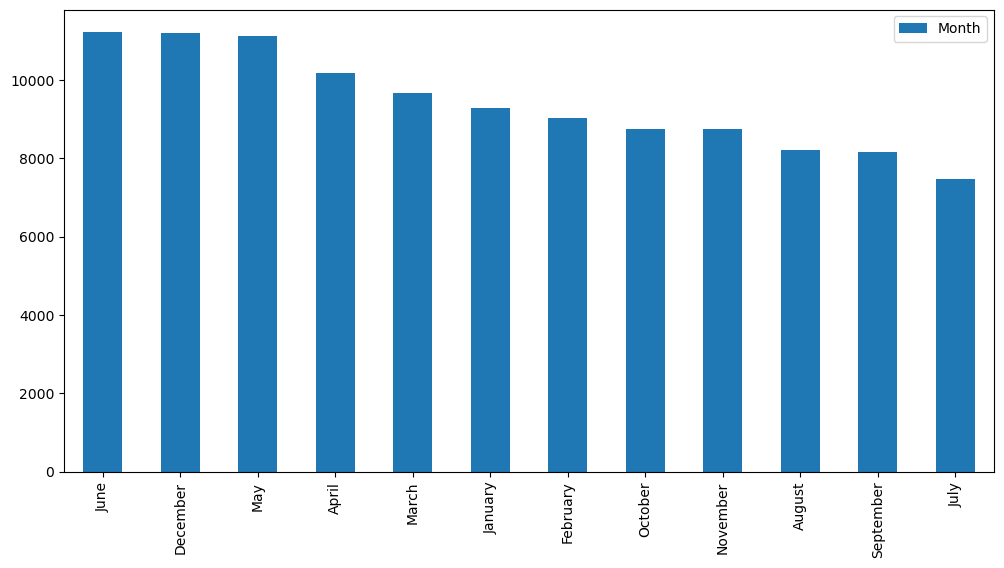

In [27]:
sales['Month'].value_counts().plot(kind='bar',figsize=(12,6) )
plt.legend()

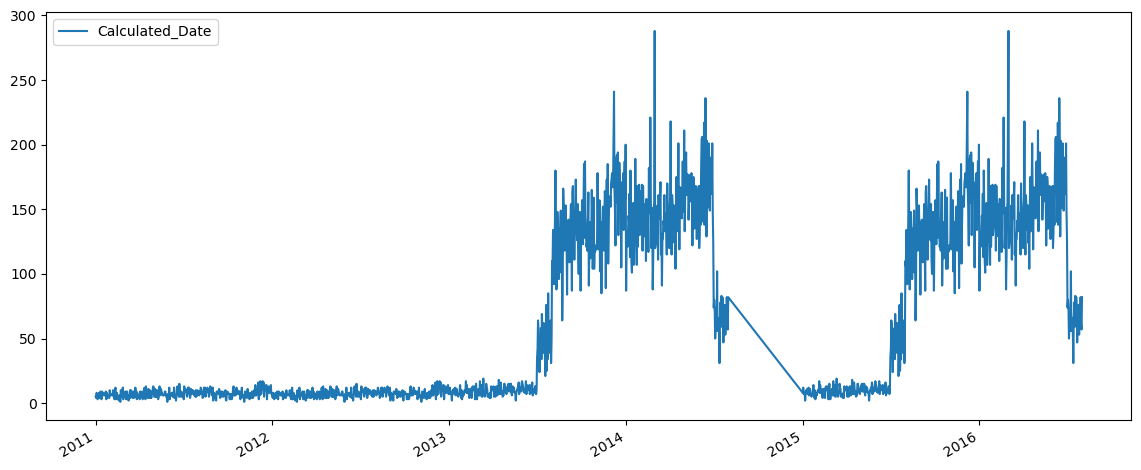

In [28]:
sales['Calculated_Date'].value_counts().plot(kind='line',figsize=(14,6))
plt.legend()

In [29]:
sales['Revenue']+50

0         1000
1         1000
2         2451
3         2138
4          468
          ... 
113031     234
113032    1233
113033    1233
113034    1310
113035    1257
Name: Revenue, Length: 113036, dtype: int64

In [30]:
sales['Revenue']

0          950
1          950
2         2401
3         2088
4          418
          ... 
113031     184
113032    1183
113033    1183
113034    1260
113035    1207
Name: Revenue, Length: 113036, dtype: int64

In [31]:
sales['Age_Group'].value_counts()

Adults (35-64)          55824
Young Adults (25-34)    38654
Youth (<25)             17828
Seniors (64+)             730
Name: Age_Group, dtype: int64

Text(0, 0.5, 'Sales')

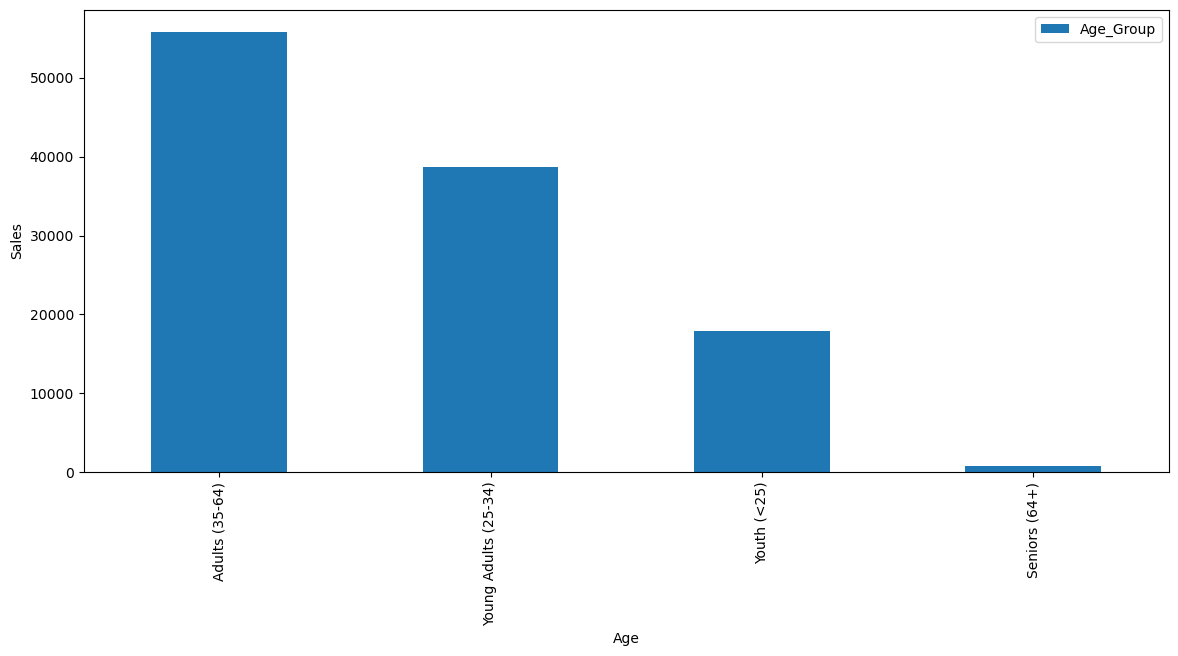

In [32]:
sales['Age_Group'].value_counts().plot(kind='bar',figsize=(14,6))
plt.legend()
plt.legend()
plt.xlabel("Age")
plt.ylabel("Sales")

Text(0.5, 1.0, 'Age Group')

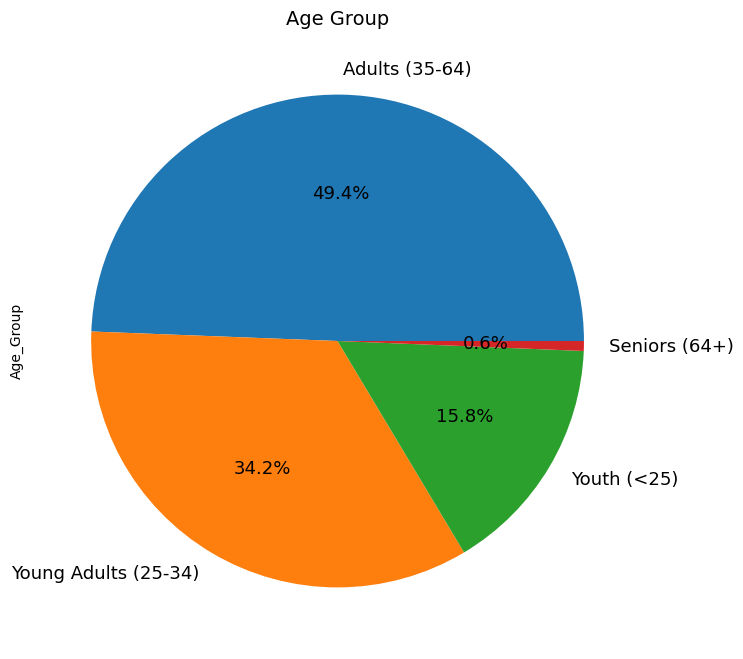

In [35]:
sales['Age_Group'].value_counts().plot(kind='pie',figsize=(14,8),autopct='%1.1f%%',fontsize=13)
plt.title("Age Group",fontsize=14)

Text(0.5, 1.0, 'Coutrywise sales')

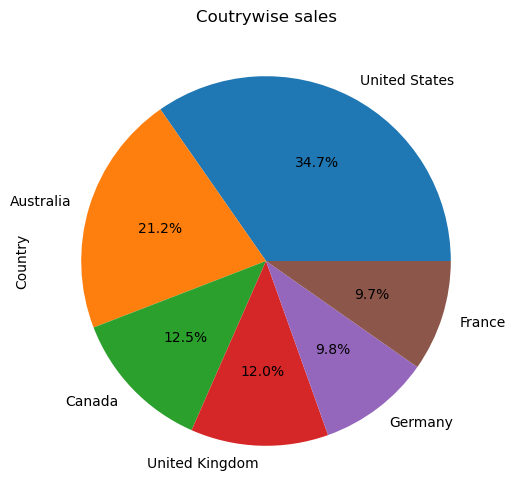

In [37]:
sales['Country'].value_counts().plot(kind='pie',autopct='%1.1f%%',figsize=(14,6))
plt.title('Coutrywise sales')

In [38]:
sales['Country'].value_counts()

United States     39206
Australia         23936
Canada            14178
United Kingdom    13620
Germany           11098
France            10998
Name: Country, dtype: int64

In [40]:
Mostsales=sales.loc[: ,"Product"].unique()

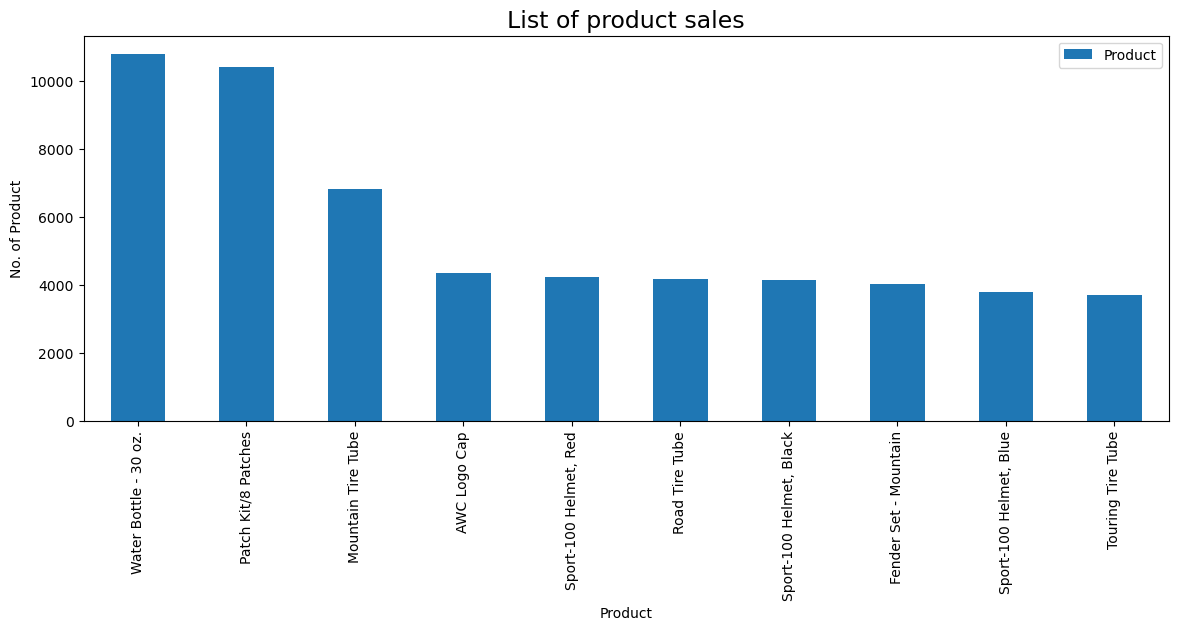

In [43]:
sales.loc[:,"Product"].value_counts().head(10).plot(kind='bar',figsize=(14,5))
plt.title("List of product sales",fontsize=17)
plt.ylabel("No. of Product")
plt.xlabel("Product")
plt.legend()
          

Text(0.5, 0, 'Unit Cost')

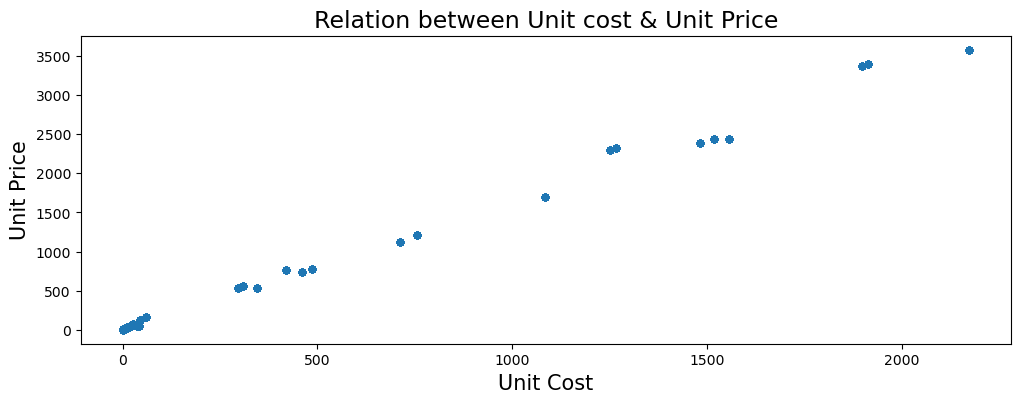

In [44]:
sales.plot(kind='scatter',x="Unit_Cost", y="Unit_Price",figsize=(12,4),fontsize=10)
plt.title("Relation between Unit cost & Unit Price",fontsize=17)
plt.ylabel("Unit Price",fontsize=15)
plt.xlabel("Unit Cost",fontsize=15)

In [45]:
sales.loc[((sales['Country']=='Canada')| (sales['Country']=='France'))].shape[0]

25176